In [50]:
import numpy as np
import matplotlib.pyplot as plt

We consider a classification problem with 2 classes. We assume that the data are linearly seperable.
To this aim, let consider two centroid, and sample point according to a gaussian distribution centered around the centroids.




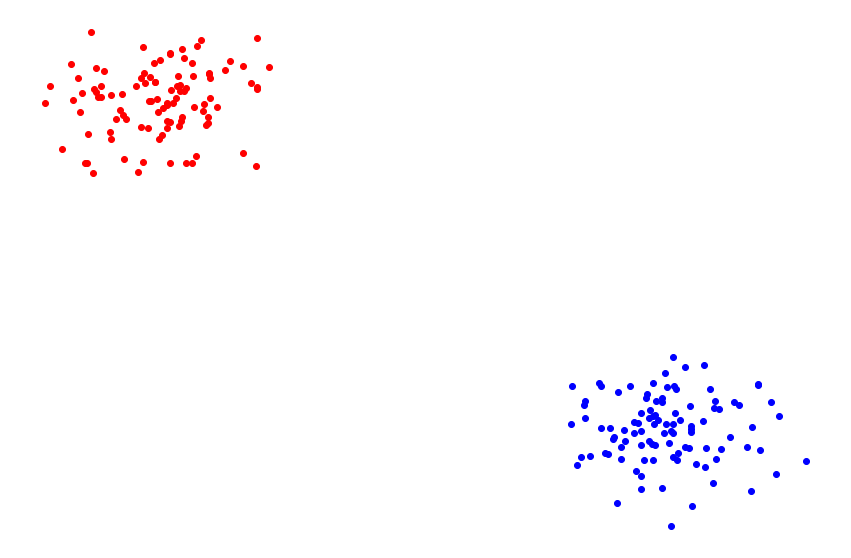

Dataset shape: (200, 1, 2)
Label shape: (200,)


In [168]:
#Generate Data 

centroid_1 = np.array([-1, 1])
centroid_2 = np.array([1, -1])
dataset_size = 100

dataset_1 = np.array([centroid_1 + np.random.randn(1, centroid_1.shape[0])/5 for i in range(dataset_size)])
label_1 = np.ones(dataset_size)

dataset_2 = np.array([centroid_2 + np.random.randn(1, centroid_1.shape[0])/5 for i in range(dataset_size)])
label_2 = np.zeros(dataset_size)

X = np.concatenate([dataset_1, dataset_2], axis=0)
Y = np.concatenate([label_1, label_2], axis=0)


plt.figure(figsize=(15, 10))
plt.scatter(dataset_1[:, 0, 0], dataset_1[:, 0, 1], color='r')
plt.scatter(dataset_2[:, 0, 0], dataset_2[:, 0, 1], color='b')
plt.axis('off')
plt.show()

print('Dataset shape: {}'.format(X.shape))
print('Label shape: {}'.format(Y.shape))

The perceptron algorithm is perfect for this case. 


What is the perceptron algorithm?
The perceptron algorithm is from Rozenblatt [Cite]. The inspiration of this algorithm come from the functioning of a neuron cell.
Assume we have labeled data. 
The input data $X = (x_1, ..., x_n)$ with n_features. And we have a label $y \in \{0, 1\}$. The weight $W \in \mathbb{R}^n$ and the bias $b \in \mathbb{R}$.
We want to weight each input. And activate the neuron with an activation function, here a sigmoid function.

$\hat{y} = \sigma(Wx + b)$, where $Wx = \sum_i w_ix_i$.

In [163]:
# Let initialize the parameters of the perceptron, and compute a forward pass.

x = np.array([[1, -1], 
              [-1, 1]])

input_shape = 2

W = weight_initialization(input_size)
b = bias_initialization()

print('Data: {}'.format(x))
print('Weight: {}'.format(W))
print('Bias: {}'.format(b))

def forward(W, b, x):
    
    linear_transform = np.dot(W, x.T) + b
    y_pred = sigmoid_activation(linear_transform)
    
    return y_pred

output = forward(W, b, x)

print('Output: {}'.format(output))

Data: [[ 1 -1]
 [-1  1]]
Weight: [[0.64535037 1.2067542 ]]
Bias: [[-0.62510763]]
Output: [[0.23388344 0.48407943]]


Now we want to evaluate the performances of our model For that we need to consider a loss function who tell us how far we are from estimation 

We want to minimize the squared loss error $\ell(y, \hat{y}) = \frac{1}{2}(\hat{y} - y)^2$ with respect to the weights and the bias. This an Empirical Risk Minimization (ERM) problem. 
$$
\min_\theta \ell(F(\theta, x), y)
$$


So we want to find the optimal couple $(W, b)$ such that:
$$
\ell(y, \hat{y}) = \frac{1}{2}(\sigma(Wx + b) - y)^2
$$
is minimal. 
To this aim, we will use numerical optimization, i.e. a gradient descent.

So we need to initialize the weights and the bias. 

We can decide to initialize to 0 or a random initialization here we choose the random approach. 
We fix a learning rate $\alpha$ (or commonly named step size in the optimization litterature).
$$
W^{(t+1)} = W^{(t)} - \alpha \nabla_{W^{(t)}}\ell(y, \hat{y}) \\
b^{(t+1)} = b^{(t)} - \alpha \nabla_{b^{(t)}}\ell(y, \hat{y})
$$

For our case, we assume that:
$$
\sigma(z) = \frac{1}{1 + \exp(-z)}
$$

Using the chain-rule, we have:
$$
\nabla_{W}\ell(y, \hat{y}) = \frac{\partial \ell(o, y)}{\partial o} \times \frac{\partial \sigma(z)}{\partial z} \times \frac{\partial z}{\partial W} \\
\nabla_{b}\ell(y, \hat{y}) = \frac{\partial \ell(o, y)}{\partial o} \times \frac{\partial \sigma(z)}{\partial z} \times \frac{\partial z}{\partial b}
$$
with $o = \sigma(Wx + b)$, $z=Wx +b$

In [ ]:
def sigmoid_activation(z):
    
    return 1./(1. + np.exp(-z))

def mse_loss(y, y_pred):
    
    return 1/2 * (y_pred - y)**2


def mse_derivative(y, y_pred):
    
    return y_pred - y

def sigmoid_derivative(z):
    
    return sigmoid_activation(z)*(1. - sigmoid_activation(z))

def backpropagate(y, y_pred, W, b, x):
    
    
    linear_transform = np.dot(W, x.T) + b
    grad_W = mse_derivative(y, y_pred) * sigmoid_derivative(linear_transform) * x
    grad_b =  mse_derivative(y, y_pred) * sigmoid_derivative(linear_transform)
    
    return grad_W, grad_b


input_size = 2
epochs = 1000
learning_rate = 0.01




# Compute one forward pass and the loss associated to this model.

#y_pred = forward_pass(W, b, x)
#loss = mse_loss(y, y_pred)
#losses.append(loss)


# Optimization of the parameters of our model.
#We use the SGD algorithm, because we use a batch size of 1.
losses = []
for i in range(epochs):
    
    
    loss = []
    for x, y in zip(X, Y):
        grad_W, grad_b = backpropagate(y, y_pred, W, b, x)
        W = W - learning_rate * grad_W
        b = b - learning_rate * grad_b
        
        output = forward(W, b, x)
        outputs.append(output)
        error = mse_loss(y, output)
        loss.append(error)
    
    losses.append(np.mean(loss))
        
    
    if(i % 100 == 0):
        print('Loss:{}'.format(losses[-1]))

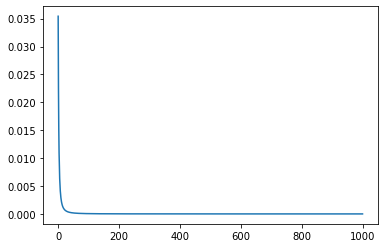

In [127]:
machine = np.arange(epochs)
plt.plot(machine, losses)

In [95]:
def decision_boundary(x, W, b):
    
    x_intercept = (0, -b/W[1])
    y_intercept = (-b/W[0], 0)
    
    slope = -W[0]/W[1]
    
    return slope*x + (-b/W[1])
    
    
h = np.linspace(-2,2)





plt.figure()
plt.scatter(dataset_1[:, 0, 0], dataset_1[:, 0, 1], color='r')
plt.scatter(dataset_2[:, 0, 0], dataset_2[:, 0, 1], color='b')
plt.plot(h, decision_boundary(h, W[0], b[0]), color='g')
plt.axis('off')
plt.show()


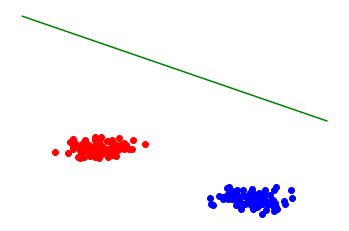

In [96]:
W_0 = weight_initialization(2)
b_0 = bias_initialization()


plt.figure()
plt.scatter(dataset_1[:, 0, 0], dataset_1[:, 0, 1], color='r')
plt.scatter(dataset_2[:, 0, 0], dataset_2[:, 0, 1], color='b')
plt.plot(h, decision_boundary(h, W_0[0], b_0[0]), color='g')
plt.axis('off')
plt.show()


In [154]:
class Perceptron():
    
    def __init__(self, input_shape, learning_rate, epochs, activation="sigmoid"):
        
        
        self.input_shape = input_shape
        self.lr = learning_rate
        self.epochs = epochs
        
        self.weights = None
        self.bias = None
        
        if activation == "sigmoid":
            self.activation = Sigmoid()
        
        
        self._build()
    
    
    
    def _build(self):
        
        self.weights = self.weight_initialization()
        self.bias = self.bias_initialization()
    
    
    def predict(self, X):
        
        
        output = self.forward(X)
        y_pred = np.where(output > 0.5, 1, 0)
        
        return y_pred
    
    def forward(self, x):
        
        linear_transform = np.dot(self.weights, x.T) + self.bias
        output = self.activation.activate(linear_transform)
        
        return output
    
    def backpropagate(self, x, y):
        
        linear_transform = np.dot(self.weights, x.T) + self.bias
        
        grad_W = mse_derivative(y, y_pred) * sigmoid_derivative(linear_transform) * x
        grad_b =  mse_derivative(y, y_pred) * sigmoid_derivative(linear_transform)

        return grad_W, grad_b
        
        
        
        

    
    def fit(self, X, Y):
        
        
        losses = []
        for i in range(self.epochs):
            for idx, x in enumerate(X):
                y = Y[idx]
                output = self.forward(x)
                
                
                
                grad_W, grad_b = self.backpropagate(x, y)
                self.weights = self.weights - self.lr * grad_W
                self.bias = self.bias - self.lr * grad_b

                output = self.forward(x)
                error = mse_loss(y, output)
                loss.append(error)

            losses.append(np.mean(loss))
        
    
            if(i % 10 == 0):
                print('Loss:{}'.format(losses[-1]))
        
        return losses
                
                
    
    
    def weight_initialization(self):
    
        return np.random.randn(1, self.input_shape)

    def bias_initialization(self):
    
        return np.random.randn(1,1)
    
    

    
 


In [1]:
from activation import Sigmoid

    
sigmoid = Sigmoid()

In [155]:
input_shape = 2
learning_rate = 0.1
epochs = 100

perceptron = Perceptron(input_shape, learning_rate, epochs)

losses = perceptron.fit(X, Y)



print(losses)

Loss:0.002725118371313471
Loss:0.002643919864895041
Loss:0.0025624230245529594
Loss:0.002485501295715909
Loss:0.0024129728407910056
Loss:0.0023445179634353918
Loss:0.002279819552716418
Loss:0.0022185841263023033
Loss:0.002160544708796065
Loss:0.0021054595894432265
[0.002725118371313471, 0.00271890442410315, 0.00271113594059241, 0.0027029292080640497, 0.0026945518586187975, 0.0026861049884830193, 0.0026776361480774185, 0.002669170851317348, 0.0026607240417521666, 0.002652305026764214, 0.002643919864895041, 0.002635572626207801, 0.002627266104353752, 0.0026190022413377563, 0.0026107823924647593, 0.0026026074978864966, 0.0025944781972537974, 0.0025863949084638307, 0.002578357883045239, 0.0025703672459314116, 0.0025624230245529594, 0.0025545251704688567, 0.0025466735756871388, 0.0025388680851420277, 0.0025311085063466515, 0.002523394616941432, 0.0025157261706548074, 0.0025081029020521963, 0.002500524530350248, 0.0024929907625030273, 0.002485501295715909, 0.0024780558195058823, 0.0024706540

In [145]:
perceptron.activation.activate(0)

AttributeError: 'Sigmoid' object has no attribute 'activate'

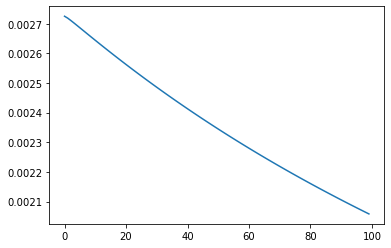

In [156]:
plt.plot(np.arange(100), losses)

In [3]:
import numpy as np

x = np.array([1,-1, -2, 3])

print(np.maximum(0, x))

[1 0 0 3]
